# Rate my GU

In [0]:
!wget https://github.com/DanyWind/X-AI/raw/master/lesson_2_neural_networks/data/gu-dataset_1.zip

--2019-05-26 16:43:00--  https://github.com/DanyWind/X-AI/raw/master/lesson_2_neural_networks/data/gu-dataset_1.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanyWind/X-AI/master/lesson_2_neural_networks/data/gu-dataset_1.zip [following]
--2019-05-26 16:43:00--  https://raw.githubusercontent.com/DanyWind/X-AI/master/lesson_2_neural_networks/data/gu-dataset_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14926725 (14M) [application/zip]
Saving to: ‘gu-dataset_1.zip.1’

gu-dataset_1.zip.1  100%[===================>]  14.23M  --.-KB/s    in 0.1s    

2019-05-26 16:43:00 (111 MB/s) - ‘gu-

In [0]:
!unzip gu-dataset_1.zip

Archive:  gu-dataset_1.zip
replace gu-dataset/test/1_nkm.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: gu-dataset/test/1_nkm.jpg  
replace gu-dataset/test/290px-Haliaeetus_leucocephalus2_(softeis).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gu-dataset/test/290px-Haliaeetus_leucocephalus2_(softeis).jpg  
  inflating: gu-dataset/test/47319692_10156263891449335_2895344725336784896_n.jpg  
  inflating: gu-dataset/test/47572454_10156263891589335_2328227317903523840_n.jpg  
  inflating: gu-dataset/test/_yl_6298.JPG  
  inflating: gu-dataset/test/ssr01-look.jpg  
  inflating: gu-dataset/train/GU/18519866_298490303926787_5633673743664020213_n.jpg  
  inflating: gu-dataset/train/GU/18557074_1305750019541488_2087549938473662552_n.jpg  
  inflating: gu-dataset/train/GU/18620358_1532216153529939_6034482218542075598_n.jpg  
  inflating: gu-dataset/train/GU/18622287_301513106957840_2749934034558006890_n.jpg  
  inflating: gu-dataset/train/GU/18622677_287372991722458_8379963

In [0]:
!ls

gu-dataset  gu-dataset_1.zip  gu-dataset_1.zip.1  sample_data


In [0]:
from fastai.vision import *
from fastai.basic_data import DatasetType

def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

random_seed(42, True)        

# Path to the dataset
PATH = Path()
gu_ds = PATH/"gu-dataset"

# We get the transforms of the images
tfms = get_transforms(do_flip=False)

# We load the dataset
data = (ImageList.from_folder(gu_ds)
       .split_by_folder()
       .label_from_folder()
       .add_test_folder()
       .transform(tfms = tfms, size = 224)
       .databunch(bs = 6))

In [0]:
# We load the model 
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [0]:
# We fit the model
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.425691,1.201088,0.857143,00:03


In [0]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.512580,0.297664,0.857143,00:03
1,0.538517,0.134409,0.857143,00:03


tensor([[7.0238e-02, 9.2976e-01],
        [5.0345e-02, 9.4966e-01],
        [5.7707e-04, 9.9942e-01],
        [9.9999e-01, 5.4682e-06],
        [9.9999e-01, 1.3144e-05],
        [9.9026e-01, 9.7414e-03]])


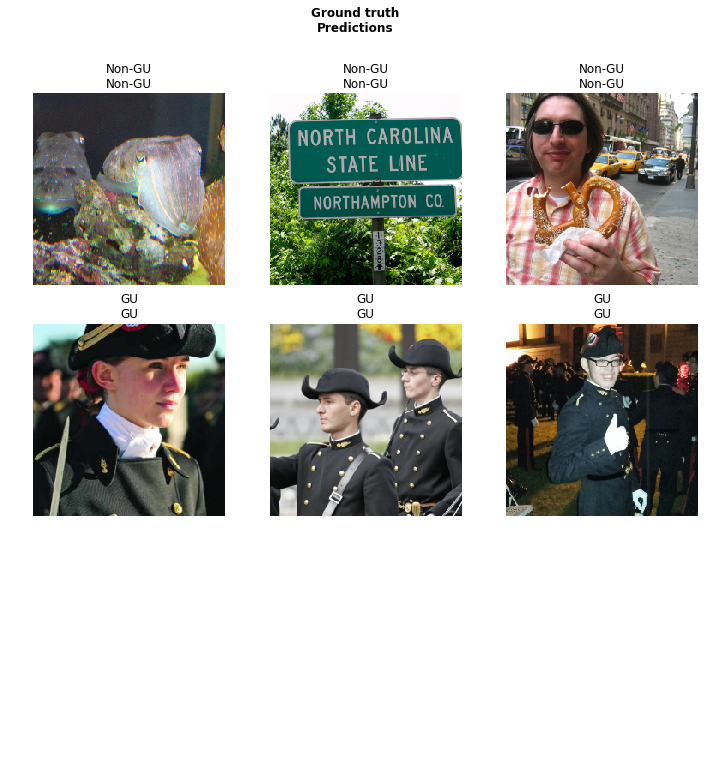

In [0]:
print(learn.pred_batch(DatasetType.Valid))

learn.show_results(DatasetType.Valid)

tensor([[0.0818, 0.9182],
        [0.0369, 0.9631],
        [0.0043, 0.9957],
        [0.0485, 0.9515],
        [0.9827, 0.0173],
        [0.0332, 0.9668]])


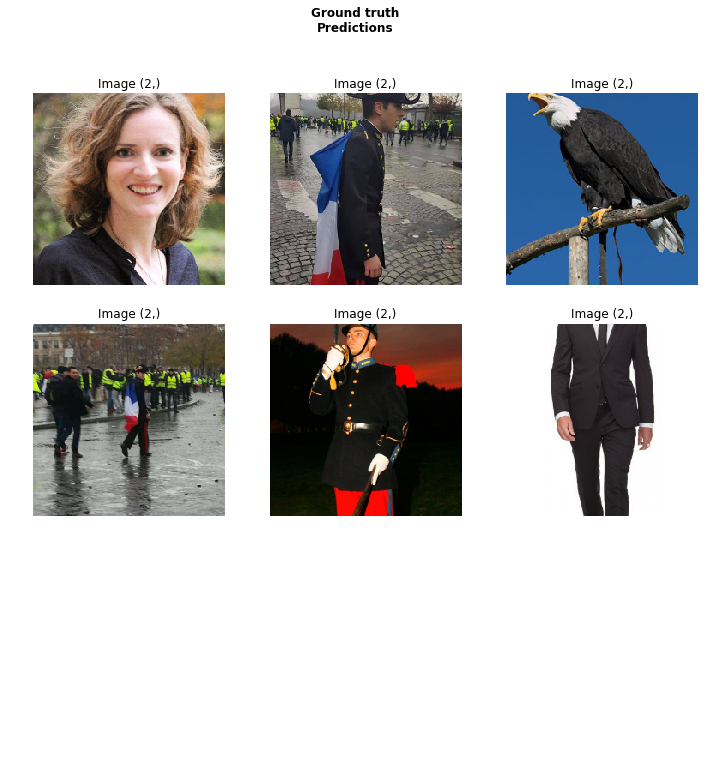

In [0]:
print(learn.pred_batch(DatasetType.Test))

learn.show_results(DatasetType.Test)